# Analogies
This notebook investigates analogies between wordvectors.
As input, we use a file with embeddings generated by [embiggen](https://pypi.org/project/embiggen/]) together
with a file with the corresponding word labels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.spatial.distance import cosine
from collections import defaultdict
from sklearn.cluster import DBSCAN


The following code allows us to import the ``kcet`` module from the local repository.

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
from kcet import Wordvec2Cosine

The constructor of ``Wordvec2Cosine`` loads the word embeddings and words into a pandas dataframe.

In [3]:
data_directory = 'data/embeddings_final'
if not os.path.isdir(data_directory):
    raise FileNotFoundError("Could not find data directory")
embedding_file = os.path.join(data_directory, "embedding_SG_dim100_upto2020.npy")
words_file = os.path.join(data_directory, "words_SG_upto2020.txt")
w2c = Wordvec2Cosine(embeddings=embedding_file, words=words_file)
df_pubmed_words = w2c.get_embeddings()
df_pubmed_words.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
cell,2.892186,-4.601290,1.886768,3.363972,5.323241,2.037415,-4.547163,2.887746,0.078090,-6.857232,...,-2.348537,4.792399,3.246019,-3.045483,-4.771703,6.965374,-1.852824,0.788342,0.692204,8.816134
patient,3.030980,-4.654769,1.988458,3.286587,4.494266,4.335152,-3.879949,1.414752,0.948940,-4.057512,...,-1.655231,5.274243,5.277645,-1.659015,-4.128818,5.872729,-3.746760,1.387476,-0.132648,8.704845
meshd009369,3.125736,-5.037050,1.834232,3.044192,4.652200,3.345147,-2.471191,2.407151,0.459735,-5.215952,...,-1.343417,3.949077,5.909581,-3.753628,-5.255637,6.504014,-3.489765,1.265763,0.166798,9.207653
0,3.207781,-5.854365,2.169951,2.806666,3.704714,4.489932,-3.641227,2.849144,1.368201,-5.305769,...,-1.802601,4.349891,5.042999,-1.330444,-3.057492,6.769782,-4.191097,0.704711,0.271818,7.927824
study,3.093263,-3.081187,1.896351,3.586287,3.835986,3.025896,-3.602392,3.394049,0.388296,-4.770427,...,-1.487065,4.371748,4.851753,-3.033936,-4.145646,6.956510,-3.810457,0.859616,0.380740,8.665388


In [4]:
df_pubmed_words.shape

(293274, 100)

## Embeddings of the words ;"lung", "lung neoplasms", "breast", "breast neoplasms", "ovarian", "ovarian neoplasms", "liver", "liver neoplasms"

In [6]:
#meshd008175 lung neoplasms 
#meshd001943 breast neoplasms
#meshd008113 liver neoplasms
#meshd010051 ovarian neoplasms
df_words = df_pubmed_words.loc[["lung", "meshd008175", "breast", "meshd001943", "ovary", "meshd010051", "liver", "meshd008113"]]


In [7]:
df_words

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
lung,3.196993,-4.231648,1.659041,4.174098,2.751357,3.321926,-2.715797,3.439398,0.508167,-6.636255,...,-1.730516,4.045200,5.256654,-2.251897,-3.720957,5.053051,-2.156815,1.889451,0.652380,9.955623
meshd008175,3.301751,-4.811779,1.622228,3.851357,2.915498,3.848569,-1.740700,3.183929,0.596785,-5.987088,...,-2.284585,2.975377,5.520432,-2.285758,-3.951332,4.657407,-2.712857,2.580101,0.411148,8.063503
breast,2.932045,-2.258747,1.727347,3.481520,3.250926,4.625692,-3.668364,3.829142,0.252712,-6.158445,...,-1.614505,5.565101,5.280187,-3.592336,-4.315172,7.719002,-5.337784,1.534341,0.529590,9.611197
meshd001943,3.212003,-1.882929,1.929095,3.227999,3.379572,3.978704,-2.658826,4.842093,0.024247,-5.611629,...,-1.743007,3.623182,4.277930,-3.402141,-5.300494,7.399817,-6.084196,2.057205,0.085744,7.320337
ovary,2.630601,-2.998020,2.116871,3.707161,3.642615,3.256233,-2.412137,3.244543,0.055791,-5.618137,...,-1.668545,5.819878,4.544055,-1.779628,-3.562068,5.432440,-4.451223,0.891037,0.305600,9.005716
meshd010051,3.072791,-2.909225,2.060097,4.283984,5.044001,3.521364,-2.625771,2.760182,0.359268,-5.208926,...,-2.067533,4.287587,5.239411,-2.756318,-4.954819,6.051542,-4.532008,0.841578,0.163029,7.852741
liver,3.179260,-4.553947,1.776016,3.099318,4.230488,4.222075,-3.451780,3.541979,1.000978,-5.536757,...,-0.397900,4.735034,5.977280,-2.495616,-3.424710,4.810229,-3.058471,2.407142,0.092114,10.095568
meshd008113,3.004256,-5.385717,1.737515,2.379135,3.612733,4.857090,-2.498205,2.739218,1.137355,-5.264485,...,-0.762170,4.384346,6.206931,-2.656664,-3.667631,4.676504,-2.116742,1.954225,0.480516,9.376901


# PCA visualization

In [8]:
cvec=["red","orange","blue","green","cyan","grey"]
cvec=["red","darkorange","blue","green","darkturquoise","dimgrey","magenta","black"]


In [9]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_words.values)
df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.44268882 0.20793962 0.15681326]


Text(0, 0.5, 'PC 2 (21%)')

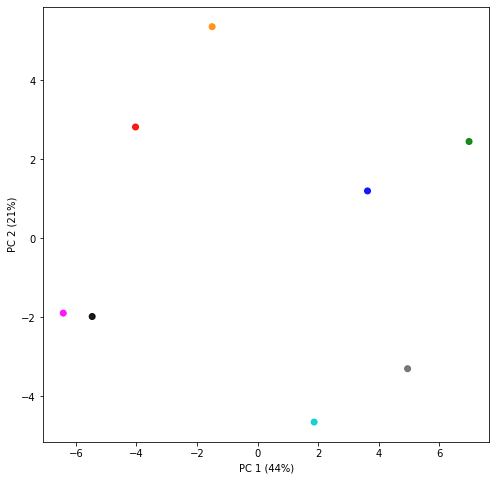

In [10]:
plt.figure(figsize=(8,8))

plt.scatter(pca_result[:,0],pca_result[:,1] ,c=cvec, alpha=0.9)
plt.xlabel('PC 1 (%.f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.f%%)' % (pca.explained_variance_ratio_[1]*100)) 


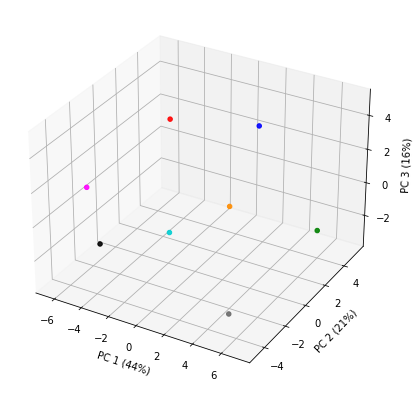

In [11]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.font_manager as font_manager

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(pca_result[:,0], pca_result[:,1], pca_result[:,2], color = cvec,alpha=0.9)
#plt.title("3D scatter plot")
ax.set_xlabel('PC 1 (%.f%%)' % (pca.explained_variance_ratio_[0]*100)) 
ax.set_ylabel('PC 2 (%.f%%)' % (pca.explained_variance_ratio_[1]*100)) 
ax.set_zlabel('PC 3 (%.f%%)' % (pca.explained_variance_ratio_[2]*100))
 
# show plot
plt.show()
fig.savefig("tissue_tissue_cancer.png")